In [1]:
#Loading libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
#Loading and reading datasets
train_df = pd.read_csv(r'...\train.csv',dtype={"Age": np.float64},)
test_df = pd.read_csv(r'...\test.csv',dtype={"Age": np.float64},)

In [3]:
#Checking the train data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Age columns should not have null values for better predictive learning model 

mean_age = train_df['Age'].mean(axis=0)
train_df['Age'] = train_df['Age'].fillna(mean_age)
mean_age = test_df['Age'].mean(axis=0)
test_df['Age'] = test_df['Age'].fillna(mean_age)

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Previewing the train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [ ]:
#Dropping some columns of the train dataset.This process will increase up the speed of the EDA analysis for 
the train data set.However a small loss prediction accuracy can be for machine learning model.  

train_df = train_df.drop(['Name','SibSp','Parch','Ticket','Cabin','PassengerId'],axis=1 )
train_df.head()

In [ ]:
#This is the last step on ETL process.ETL processing handle for better data analysis and visualizations.
#At this step  null values were filled by the median values and string values were converted to numerical values for
#computing machine learning model.

train_df["Embarked"] = train_df["Embarked"].fillna("S")
train_df["Sex"] = train_df["Sex"].fillna("male")
test_df["Embarked"] = test_df["Embarked"].fillna("S")
test_df["Sex"] = test_df["Sex"].fillna("male")

train_df.loc[train_df["Embarked"] == "S", "Embarked"] = 0
train_df.loc[train_df["Embarked"] == "C", "Embarked"] = 1
train_df.loc[train_df["Embarked"] == "Q", "Embarked"] = 2

test_df.loc[test_df["Embarked"] == "S", "Embarked"] = 0
test_df.loc[test_df["Embarked"] == "C", "Embarked"] = 1
test_df.loc[test_df["Embarked"] == "Q", "Embarked"] = 2

test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())
train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].median())

train_df.loc[train_df["Sex"] == "male", "Sex"] = 0
train_df.loc[train_df["Sex"] == "female", "Sex"] = 1

test_df.loc[test_df["Sex"] == "male", "Sex"] = 0
test_df.loc[test_df["Sex"] == "female", "Sex"] = 1

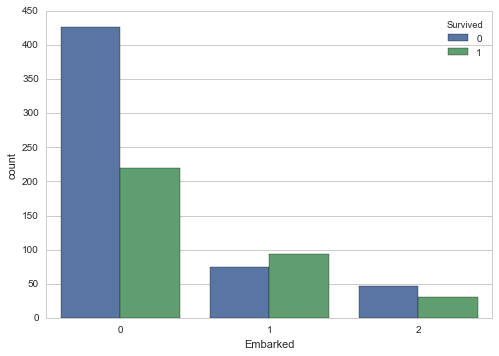

In [9]:
#Data analysis and visualizations step
#Most survived numbers aboarded from the S city.And S city has the worst survived rate.
#Best survived rate city is "C".And the C city has second most survived numbers.Survived rate  city order is 1-2-0 "C-Q-S"

sns.countplot(x='Embarked',hue='Survived',data=train_df)

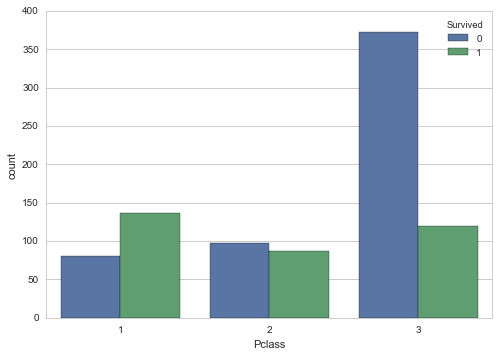

In [10]:
#Passenger class 1 has the best  survived rate and most survived numbers.
#Survived rate passenger class order  is  "1-2-3" and survived numbers "1-3-2"

sns.countplot(x='Pclass',hue='Survived',data=train_df)

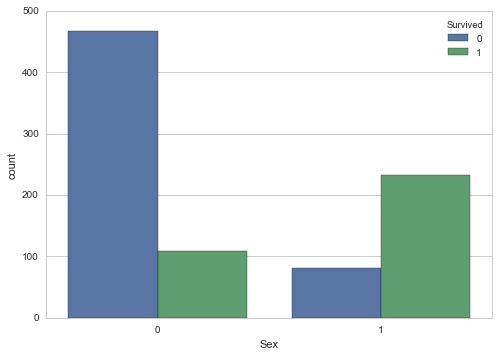

In [11]:
#Females  have better survived rate than Males passengers and the most survived numbers 0=Male,1=Female
sns.countplot(x='Sex',hue='Survived',data=train_df)

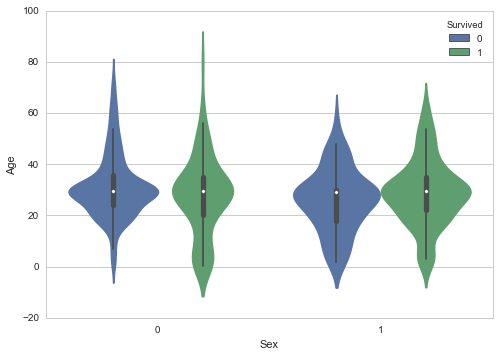

In [12]:
#Most survived numbers are  from 20-40 age group. 
#In Females  according to age group survived rate order is  20-40, 0-20,60-80 and 40-60.
#In Males , Children group are  which  between 0 and 10 ages that have better survived rate  than Female Children group.
sns.violinplot(y='Age',x='Sex',hue='Survived',data=train_df)

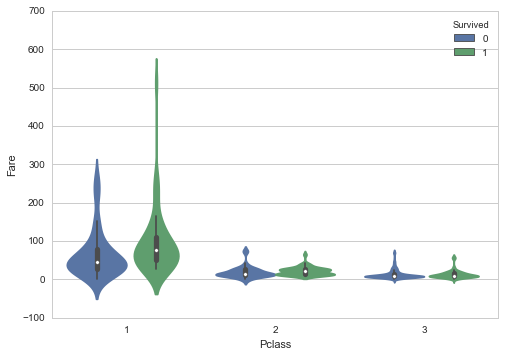

In [13]:
#In the first passenger class,  passengers have better survived rate with paid fares greater than 100.
sns.violinplot(y='Fare',x='Pclass',hue='Survived',data=train_df)

In [14]:
#According to exploratory data analysis and visualizations i decided to this prediction problem is a Classification 
#topic in Machine Learning.Because the prediction survived column value are affected by many categorical values and 
#relationships in each others.Decision tree is suitable for like these multi conditional classifying problems.
#And Random Forest algorithm is a great solver for  multiple decision trees .
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


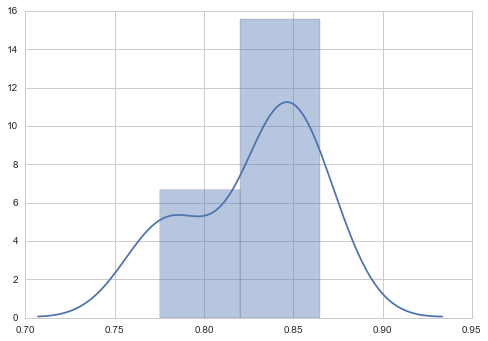

In [15]:
#creating machine learning model and evaluating the performance.
#At the below histogram graph , with 10 fold cross validation scoring numbers were visualized with histogram distribution.
#Titanic survived passengers were predicted with mean % 82,72.

from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation

predictors=["Pclass","Sex","Embarked","Age","Fare"]
model = RandomForestClassifier(n_estimators=20,min_samples_split=5,min_samples_leaf=5)
scores = cross_validation.cross_val_score(model,train_df[predictors],train_df['Survived'],cv=10)
sns.distplot(scores)

In [16]:
print(scores.mean())

0.827212007718
